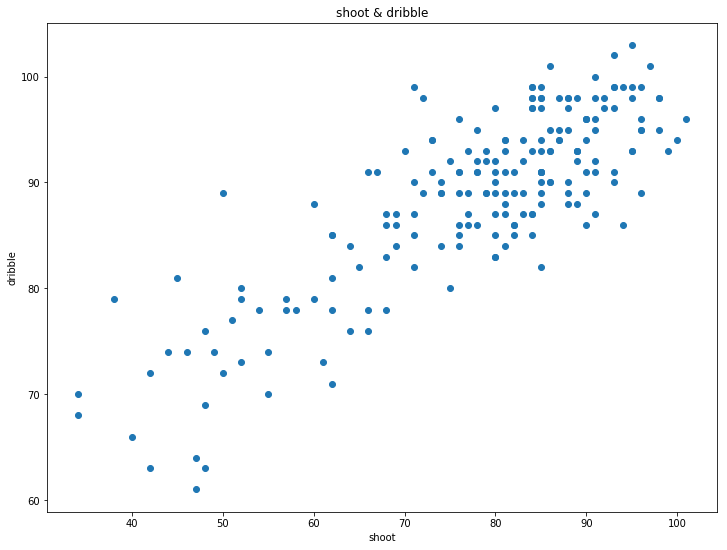

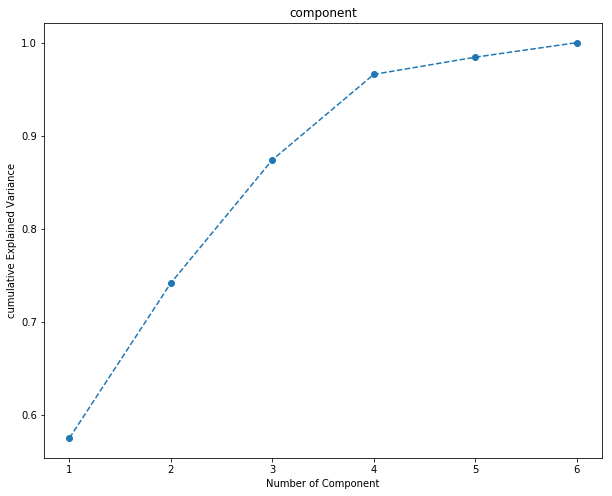

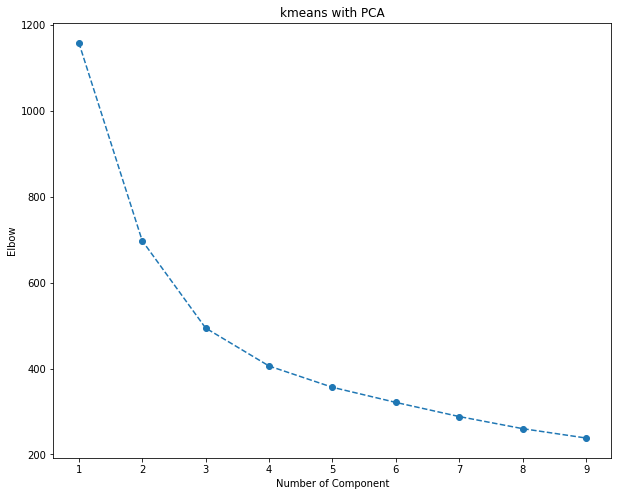

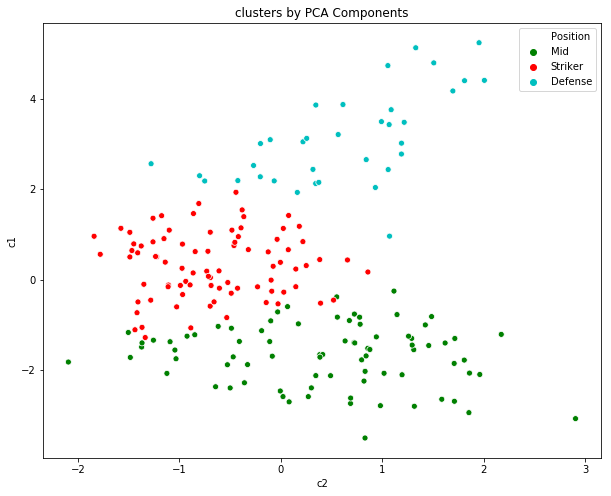

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


df = pd.read_csv("player_data.csv", index_col = 0)
df = df[["speed", "shoot", "pass", "dribble", "defense", "physical"]]

plt.figure(figsize = (12, 9))
plt.scatter(df.iloc[:, 1], df.iloc[:, 3])
plt.xlabel('shoot')
plt.ylabel('dribble')
plt.title('shoot & dribble')
plt.show()

# 표준화
scaler = StandardScaler()
std = scaler.fit_transform(df)

# PCA를 사용하여 표준화 된 데이터를 fit
pca = PCA()
pca.fit(std)

# 누적 분산도를 기반으로 피쳐 수 측정
plt.figure(figsize = (10,8))
plt.plot(range(1, 7), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = "--")
plt.title('component')
plt.xlabel('Number of Component')
plt.ylabel('cumulative Explained Variance')
plt.show()

# 선택한 수의 구성 요소로 PCA 실행
pca = PCA(n_components = 4)
pca.fit(std)
pca.transform(std)
scores_pca = pca.transform(std)

# 최적의 cluster 수 구하기
elbow = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    elbow.append(kmeans_pca.inertia_)

plt.figure(figsize = (10,8))
plt.plot(range(1, 10), elbow, marker = 'o', linestyle = "--")
plt.title('kmeans with PCA')
plt.xlabel('Number of Component')
plt.ylabel('Elbow')
plt.show()

# PCA - K-Means 
kmeans_pca = KMeans(n_clusters = 3)
kmeans_pca.fit(scores_pca)
df_pca_kmeans = pd.concat([df, pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-4:] = ['c1','c2','c3','c4']
df_pca_kmeans['K-Means PCA'] = kmeans_pca.labels_
df_pca_kmeans['Position'] = df_pca_kmeans['K-Means PCA'].map({ 0 : 'Striker',
                                                            1 : 'Mid',
                                                            2 : 'Defense'})
x_axis = df_pca_kmeans['c2']
y_axis = df_pca_kmeans['c1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['Position'], palette = ['g', 'r', 'c'])
plt.title('clusters by PCA Components')
plt.show()